# Data Prep

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('max_columns', 100)
from datetime import datetime
import math

In [238]:
df1 = pd.read_csv("train.csv")

In [239]:
df1.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [240]:
df1.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [241]:
df1['Dates'] = df1['Dates'].astype('datetime64[ns]')

In [242]:
dropDescRes_df = df1.drop(columns=['Descript', 'Resolution'])

In [243]:
dropDescRes_df.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541


### Recherche des NaN

In [244]:
df_isna = dropDescRes_df.isna().sum().apply(lambda col:round(col/len(df1)*100, 2))
df_isna.sort_values(ascending=False).apply(lambda col: str(col) + " %" )

Y             0.0 %
X             0.0 %
Address       0.0 %
PdDistrict    0.0 %
DayOfWeek     0.0 %
Category      0.0 %
Dates         0.0 %
dtype: object

In [245]:
dropDescRes_df['PdDistrict'].unique()

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

# DayOfWeek

In [246]:
dropDescRes_df['WeekEnd']=dropDescRes_df['DayOfWeek'].apply(lambda val: 1 if val in ["Friday", "Saturday", "Sunday"] else 0)

In [247]:
dropDescRes_df.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,WeekEnd
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,0
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,0
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,0
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,0


In [248]:
ohe_cols_dayofweek = pd.get_dummies(dropDescRes_df['DayOfWeek'], dummy_na=False, prefix='Day_')

In [249]:
ohe_cols_dayofweek.head()

,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [250]:
ohe_df_dayofweek = pd.concat([
    dropDescRes_df.drop(columns=['DayOfWeek']),
    ohe_cols_dayofweek
], axis=1)

In [251]:
ohe_df_dayofweek.head()

,Dates,Category,PdDistrict,Address,X,Y,WeekEnd,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday
0,2015-05-13 23:53:00,WARRANTS,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1
1,2015-05-13 23:53:00,OTHER OFFENSES,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1
2,2015-05-13 23:33:00,OTHER OFFENSES,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,0,0,0,0,0,0,1
3,2015-05-13 23:30:00,LARCENY/THEFT,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,0,0,0,0,0,0,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,0,0,0,0,0,0,0,1


# PdDistrict

In [252]:
ohe_df_dayofweek['PdDistrict'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [253]:
ohe_cols_pddistrict = pd.get_dummies(ohe_df_dayofweek['PdDistrict'], dummy_na=False, prefix='Dis_')

In [254]:
ohe_cols_pddistrict.head()

,Dis__BAYVIEW,Dis__CENTRAL,Dis__INGLESIDE,Dis__MISSION,Dis__NORTHERN,Dis__PARK,Dis__RICHMOND,Dis__SOUTHERN,Dis__TARAVAL,Dis__TENDERLOIN
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [255]:
ohe_df_PdDistrict = pd.concat([
    ohe_df_dayofweek.drop(columns=['PdDistrict']),
    ohe_cols_pddistrict
], axis=1)

In [256]:
ohe_df_PdDistrict.head()

,Dates,Category,Address,X,Y,WeekEnd,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday,Dis__BAYVIEW,Dis__CENTRAL,Dis__INGLESIDE,Dis__MISSION,Dis__NORTHERN,Dis__PARK,Dis__RICHMOND,Dis__SOUTHERN,Dis__TARAVAL,Dis__TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,1500 Block of LOMBARD ST,-122.426995,37.800873,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,100 Block of BRODERICK ST,-122.438738,37.771541,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


# Dates

In [257]:
ohe_df_Dates = ohe_df_PdDistrict

In [258]:
ohe_df_Dates['Year']=ohe_df_Dates['Dates'].dt.year
ohe_df_Dates['Month']=ohe_df_Dates['Dates'].dt.month
ohe_df_Dates['Hour']=ohe_df_Dates['Dates'].dt.hour

In [259]:
ohe_df_Dates.head()

,Dates,Category,Address,X,Y,WeekEnd,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday,Dis__BAYVIEW,Dis__CENTRAL,Dis__INGLESIDE,Dis__MISSION,Dis__NORTHERN,Dis__PARK,Dis__RICHMOND,Dis__SOUTHERN,Dis__TARAVAL,Dis__TENDERLOIN,Year,Month,Hour
0,2015-05-13 23:53:00,WARRANTS,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23
1,2015-05-13 23:53:00,OTHER OFFENSES,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23
2,2015-05-13 23:33:00,OTHER OFFENSES,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23
3,2015-05-13 23:30:00,LARCENY/THEFT,1500 Block of LOMBARD ST,-122.426995,37.800873,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23
4,2015-05-13 23:30:00,LARCENY/THEFT,100 Block of BRODERICK ST,-122.438738,37.771541,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2015,5,23


In [260]:
ohe_df_Dates['Spring'] = ohe_df_Dates['Month'].apply(lambda val: 1 if val in range(4, 7) else 0)
ohe_df_Dates['Summer'] = ohe_df_Dates['Month'].apply(lambda val: 1 if val in range(7, 10) else 0)
ohe_df_Dates['Autumn'] = ohe_df_Dates['Month'].apply(lambda val: 1 if val in range(10, 1) else 0)
ohe_df_Dates['Winter'] = ohe_df_Dates['Month'].apply(lambda val: 1 if val in range(1, 4) else 0)

In [261]:
ohe_df_Dates.head()

,Dates,Category,Address,X,Y,WeekEnd,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday,Dis__BAYVIEW,Dis__CENTRAL,Dis__INGLESIDE,Dis__MISSION,Dis__NORTHERN,Dis__PARK,Dis__RICHMOND,Dis__SOUTHERN,Dis__TARAVAL,Dis__TENDERLOIN,Year,Month,Hour,Spring,Summer,Autumn,Winter
0,2015-05-13 23:53:00,WARRANTS,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,1500 Block of LOMBARD ST,-122.426995,37.800873,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,100 Block of BRODERICK ST,-122.438738,37.771541,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2015,5,23,1,0,0,0


In [262]:
ohe_df_Dates.drop(columns=['Dates'], inplace=True)

In [263]:
ohe_df_Dates.head()

,Category,Address,X,Y,WeekEnd,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday,Dis__BAYVIEW,Dis__CENTRAL,Dis__INGLESIDE,Dis__MISSION,Dis__NORTHERN,Dis__PARK,Dis__RICHMOND,Dis__SOUTHERN,Dis__TARAVAL,Dis__TENDERLOIN,Year,Month,Hour,Spring,Summer,Autumn,Winter
0,WARRANTS,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0
1,OTHER OFFENSES,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0
2,OTHER OFFENSES,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0
3,LARCENY/THEFT,1500 Block of LOMBARD ST,-122.426995,37.800873,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0
4,LARCENY/THEFT,100 Block of BRODERICK ST,-122.438738,37.771541,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2015,5,23,1,0,0,0


### Recherche de l'évolution du nombre de crime en fonction des années / mois / heures

C:\Users\elien\Anaconda3\envs\majeure-ml-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


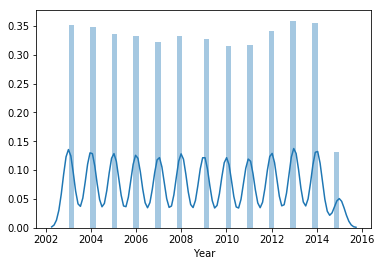

In [264]:
sns.distplot(ohe_df_Dates['Year'])

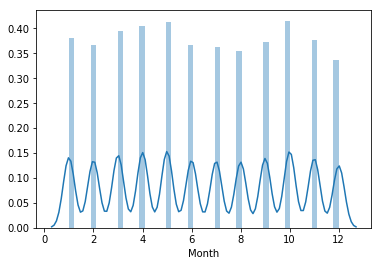

In [265]:
sns.distplot(ohe_df_Dates['Month'])

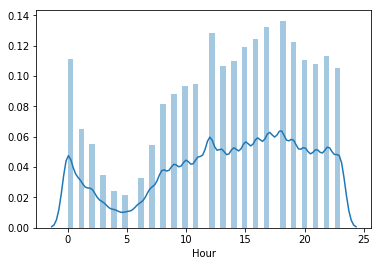

In [266]:
sns.distplot(ohe_df_Dates['Hour'])

### Catégorisation des heures

In [267]:
ohe_df_Dates['Night'] = ohe_df_Dates['Hour'].apply(lambda val: 1 if val in range(0, 6) else 0)
ohe_df_Dates['Morning'] = ohe_df_Dates['Hour'].apply(lambda val: 1 if val in range(6, 12) else 0)
ohe_df_Dates['Afternoon'] = ohe_df_Dates['Hour'].apply(lambda val: 1 if val in range(12, 18) else 0)
ohe_df_Dates['Evening'] = ohe_df_Dates['Hour'].apply(lambda val: 1 if val in range(18, 24) else 0)

In [268]:
ohe_df_Dates.head()

,Category,Address,X,Y,WeekEnd,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday,Dis__BAYVIEW,Dis__CENTRAL,Dis__INGLESIDE,Dis__MISSION,Dis__NORTHERN,Dis__PARK,Dis__RICHMOND,Dis__SOUTHERN,Dis__TARAVAL,Dis__TENDERLOIN,Year,Month,Hour,Spring,Summer,Autumn,Winter,Night,Morning,Afternoon,Evening
0,WARRANTS,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1
1,OTHER OFFENSES,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1
2,OTHER OFFENSES,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1
3,LARCENY/THEFT,1500 Block of LOMBARD ST,-122.426995,37.800873,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1
4,LARCENY/THEFT,100 Block of BRODERICK ST,-122.438738,37.771541,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1


# Address

In [269]:
ohe_df_Address = ohe_df_Dates

### Recherche des adresses les plus présentes

In [270]:
ohe_df_Address['Address'].str.extract(r'(\b\w{2}\b)')[0].unique()

array(['ST', 'AV', 'of', 'WY', 'BL', 'DR', 'JR', 'HY', 'TR', 'PL', 'RD',
       'LA', 'AL', 'CT', 'CR', 'LN', 'OF', 'PZ', 'DE', 'MC', 'MT', 'RW',
       'LE', 'US', 'PT', 'EL'], dtype=object)

In [271]:
ohe_df_Address['Address'].value_counts()

800 Block of BRYANT ST                  26533
800 Block of MARKET ST                   6581
2000 Block of MISSION ST                 5097
1000 Block of POTRERO AV                 4063
900 Block of MARKET ST                   3251
0 Block of TURK ST                       3228
0 Block of 6TH ST                        2884
300 Block of ELLIS ST                    2703
400 Block of ELLIS ST                    2590
16TH ST / MISSION ST                     2504
1000 Block of MARKET ST                  2489
1100 Block of MARKET ST                  2319
2000 Block of MARKET ST                  2168
100 Block of OFARRELL ST                 2140
700 Block of MARKET ST                   2081
3200 Block of 20TH AV                    2035
100 Block of 6TH ST                      1887
500 Block of JOHNFKENNEDY DR             1824
TURK ST / TAYLOR ST                      1810
200 Block of TURK ST                     1800
0 Block of PHELAN AV                     1791
0 Block of UNITEDNATIONS PZ       

In [272]:
ohe_df_Address.head()

,Category,Address,X,Y,WeekEnd,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday,Dis__BAYVIEW,Dis__CENTRAL,Dis__INGLESIDE,Dis__MISSION,Dis__NORTHERN,Dis__PARK,Dis__RICHMOND,Dis__SOUTHERN,Dis__TARAVAL,Dis__TENDERLOIN,Year,Month,Hour,Spring,Summer,Autumn,Winter,Night,Morning,Afternoon,Evening
0,WARRANTS,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1
1,OTHER OFFENSES,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1
2,OTHER OFFENSES,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1
3,LARCENY/THEFT,1500 Block of LOMBARD ST,-122.426995,37.800873,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1
4,LARCENY/THEFT,100 Block of BRODERICK ST,-122.438738,37.771541,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1


### Catégorisation des adresses

In [273]:
ohe_df_Address['isBlock'] = ohe_df_Address['Address'].apply(lambda val: 1 if "Block" in val else 0)
ohe_df_Address['isST'] = ohe_df_Address['Address'].apply(lambda val: 1 if " ST" in val else 0)
ohe_df_Address['isAV'] = ohe_df_Address['Address'].apply(lambda val: 1 if " AV" in val else 0)
ohe_df_Address['Intersection'] = ohe_df_Address['Address'].apply(lambda val: 1 if " / " in val else 0)

In [274]:
ohe_df_Address.head()

,Category,Address,X,Y,WeekEnd,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday,Dis__BAYVIEW,Dis__CENTRAL,Dis__INGLESIDE,Dis__MISSION,Dis__NORTHERN,Dis__PARK,Dis__RICHMOND,Dis__SOUTHERN,Dis__TARAVAL,Dis__TENDERLOIN,Year,Month,Hour,Spring,Summer,Autumn,Winter,Night,Morning,Afternoon,Evening,isBlock,isST,isAV,Intersection
0,WARRANTS,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,0,1
1,OTHER OFFENSES,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,0,1
2,OTHER OFFENSES,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,1,1
3,LARCENY/THEFT,1500 Block of LOMBARD ST,-122.426995,37.800873,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,1,1,0,0
4,LARCENY/THEFT,100 Block of BRODERICK ST,-122.438738,37.771541,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,1,1,0,0


In [275]:
ohe_df_Address.drop(columns=['Address'], inplace=True)

# Coordinates

In [276]:
ohe_df_Coordinates = ohe_df_Address

In [277]:
ohe_df_Coordinates.head()

,Category,X,Y,WeekEnd,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday,Dis__BAYVIEW,Dis__CENTRAL,Dis__INGLESIDE,Dis__MISSION,Dis__NORTHERN,Dis__PARK,Dis__RICHMOND,Dis__SOUTHERN,Dis__TARAVAL,Dis__TENDERLOIN,Year,Month,Hour,Spring,Summer,Autumn,Winter,Night,Morning,Afternoon,Evening,isBlock,isST,isAV,Intersection
0,WARRANTS,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,0,1
1,OTHER OFFENSES,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,0,1
2,OTHER OFFENSES,-122.424363,37.800414,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,1,1
3,LARCENY/THEFT,-122.426995,37.800873,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,1,1,0,0
4,LARCENY/THEFT,-122.438738,37.771541,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,1,1,0,0


In [278]:
ohe_df_Coordinates['X'].value_counts()

-122.403405    26354
-122.419658     4449
-122.406539     3891
-122.407634     3170
-122.419672     3006
-122.409854     2533
-122.406521     2329
-122.466205     2182
-122.475647     2019
-122.426956     1991
-122.407244     1954
-122.452290     1696
-122.413564     1658
-122.410769     1626
-122.394439     1622
-122.411071     1609
-122.410294     1605
-122.413609     1491
-122.414056     1452
-122.411966     1439
-122.407845     1380
-122.412515     1326
-122.365565     1300
-122.409530     1269
-122.411988     1264
-122.412784     1179
-122.414312     1177
-122.413238     1164
-122.406605     1151
-122.408068     1144
               ...  
-122.456671        1
-122.399982        1
-122.445038        1
-122.467613        1
-122.453170        1
-122.413466        1
-122.501462        1
-122.412888        1
-122.414593        1
-122.442204        1
-122.464349        1
-122.469545        1
-122.404394        1
-122.442996        1
-122.493090        1
-122.443360        1
-122.404337  

In [279]:
ohe_df_Coordinates['Y'].value_counts()

37.775421    26354
37.764221     4449
37.756486     3891
37.784189     3170
37.765050     3006
37.783386     2533
37.785063     2329
37.772541     2182
37.728528     2019
37.769247     1991
37.786565     1954
37.725693     1696
37.779514     1658
37.783215     1626
37.736444     1622
37.781751     1609
37.782231     1605
37.784697     1491
37.782793     1452
37.784914     1439
37.785094     1380
37.780478     1326
37.809671     1300
37.765718     1269
37.785023     1264
37.784866     1179
37.779834     1177
37.782843     1164
37.757158     1151
37.783992     1144
             ...  
37.765034        1
37.778050        1
37.745911        1
37.726854        1
37.736367        1
37.747507        1
37.721781        1
37.728684        1
37.755403        1
37.731817        1
37.777723        1
37.749207        1
37.778564        1
37.790325        1
37.781051        1
37.759219        1
37.709569        1
37.771415        1
37.793120        1
37.776959        1
37.761187        1
37.783588   

In [280]:
# x = long / y = lat
# xCenterSF = -122.431297
# yCenterSF = 37.773972
xPoliceSF = -122.412900
yPoliceSF = 37.783670

# distance entre 2 coordonnées X Y en mètres
def distanceBetweenM(lat1, lon1, lat2, lon2):
    dLat = np.radians(lat2-lat1)
    dLon = np.radians(lon2-lon1)

    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)

    a = np.sin(dLat/2)**2 + np.sin(dLon/2)**2 * np.cos(lat1) * np.cos(lat2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return c * 6371 * 1000

ohe_df_Coordinates['distanceSFCenterM'] = distanceBetweenM(yPoliceSF, xPoliceSF, ohe_df_Coordinates['Y'], ohe_df_Coordinates['X'])

In [281]:
ohe_df_Coordinates.head()

,Category,X,Y,WeekEnd,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday,Dis__BAYVIEW,Dis__CENTRAL,Dis__INGLESIDE,Dis__MISSION,Dis__NORTHERN,Dis__PARK,Dis__RICHMOND,Dis__SOUTHERN,Dis__TARAVAL,Dis__TENDERLOIN,Year,Month,Hour,Spring,Summer,Autumn,Winter,Night,Morning,Afternoon,Evening,isBlock,isST,isAV,Intersection,distanceSFCenterM
0,WARRANTS,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,0,1,1523.529192
1,OTHER OFFENSES,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,0,1,1523.529192
2,OTHER OFFENSES,-122.424363,37.800414,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,1,1,2116.882324
3,LARCENY/THEFT,-122.426995,37.800873,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,1,1,0,0,2278.818639
4,LARCENY/THEFT,-122.438738,37.771541,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,1,1,0,0,2641.114951


In [282]:
ohe_df_Coordinates['distanceSFCenterM'].value_counts()

1240.071818    26354
2242.771357     4449
3073.950529     3891
466.408943      3170
2154.286105     3006
269.561748      2533
581.590541      2329
4845.499824     2182
8247.750041     2019
2024.376228     1991
592.159470      1954
7317.926195     1696
465.793552      1658
194.021826      1626
5496.359614     1622
267.114533      1609
279.440278      1605
130.093884      1491
140.830741      1452
160.872596      1439
471.589416      1380
356.568285      1326
5065.226129     1300
2017.979209     1269
170.444690      1264
133.344686      1179
444.241834      1177
96.621065       1164
2999.472038     1151
426.111955      1144
               ...  
6326.544275        1
5221.962834        1
8102.468969        1
3980.118045        1
1008.083585        1
3595.167976        1
7762.961772        1
2883.692818        1
1753.675011        1
4228.729523        1
3830.586492        1
8248.410725        1
6984.994360        1
1342.705071        1
6881.871763        1
2704.100320        1
7836.046905  

In [283]:
sorted(list(ohe_df_Coordinates['distanceSFCenterM']))[:20]

[18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146,
 18.480301196930146]

In [284]:
sorted(list(ohe_df_Coordinates['distanceSFCenterM']), reverse=True)[:70]

[5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,
 5806190.983998071,


### Mise en place de catégories en fonction de la distance. 5806190m semble aberrant, mise à l'écart

In [285]:
ohe_df_Coordinates['3km']=ohe_df_Coordinates['distanceSFCenterM'].apply(lambda val: 1 if val <= 3000 else 0)
ohe_df_Coordinates['5km']=ohe_df_Coordinates['distanceSFCenterM'].apply(lambda val: 1 if (val > 3000) & (val<= 5000) else 0)
ohe_df_Coordinates['7km']=ohe_df_Coordinates['distanceSFCenterM'].apply(lambda val: 1 if (val > 5000) & (val<= 7000) else 0)
ohe_df_Coordinates['9km']=ohe_df_Coordinates['distanceSFCenterM'].apply(lambda val: 1 if (val > 7000) & (val<= 10800) else 0)
ohe_df_Coordinates['errCoor']=ohe_df_Coordinates['distanceSFCenterM'].apply(lambda val: 1 if val > 10800 else 0)

In [286]:
ohe_df_Coordinates.head()

,Category,X,Y,WeekEnd,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday,Dis__BAYVIEW,Dis__CENTRAL,Dis__INGLESIDE,Dis__MISSION,Dis__NORTHERN,Dis__PARK,Dis__RICHMOND,Dis__SOUTHERN,Dis__TARAVAL,Dis__TENDERLOIN,Year,Month,Hour,Spring,Summer,Autumn,Winter,Night,Morning,Afternoon,Evening,isBlock,isST,isAV,Intersection,distanceSFCenterM,3km,5km,7km,9km,errCoor
0,WARRANTS,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,0,1,1523.529192,1,0,0,0,0
1,OTHER OFFENSES,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,0,1,1523.529192,1,0,0,0,0
2,OTHER OFFENSES,-122.424363,37.800414,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,1,1,2116.882324,1,0,0,0,0
3,LARCENY/THEFT,-122.426995,37.800873,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,1,1,0,0,2278.818639,1,0,0,0,0
4,LARCENY/THEFT,-122.438738,37.771541,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,1,1,0,0,2641.114951,1,0,0,0,0


### Rotation des axes

In [287]:
def rotate_origin_only(x, y, radians):
    """Only rotate a point around the origin (0, 0)."""
    xx = x * math.cos(radians) + y * math.sin(radians)
    yy = -x * math.sin(radians) + y * math.cos(radians)

    return xx, yy

In [288]:
x = -122.424363
y = 37.774599
print(rotate_origin_only(x, y, math.radians(22.5)))
print(rotate_origin_only(x, y, math.radians(30)))
print(rotate_origin_only(x, y, math.radians(45)))
print(rotate_origin_only(x, y, math.radians(60)))
print("---------------------------------------------")
x = -122.425892
y = 37.800414
print(rotate_origin_only(x, y, math.radians(22.5)))
print(rotate_origin_only(x, y, math.radians(30)))
print(rotate_origin_only(x, y, math.radians(45)))
print(rotate_origin_only(x, y, math.radians(60)))

(-98.64965005489718, 81.74895430287103)
(-87.1353089001277, 93.92594385177026)
(-59.856422150240896, 113.27777236924607)
(-28.498419148229765, 124.90990790012768)
---------------------------------------------
(-98.64118369389588, 81.77338937597088)
(-87.1237255529701, 93.94906479756895)
(-59.839249354953, 113.29710749707083)
(-28.476827202431068, 124.92413955297009)


In [289]:
x = ohe_df_Coordinates['X']
y = ohe_df_Coordinates['Y']
ohe_df_Coordinates['Xr22dot5'] = rotate_origin_only(x, y, math.radians(22.5))[0]
ohe_df_Coordinates['Yr22dot5'] = rotate_origin_only(x, y, math.radians(22.5))[1]
ohe_df_Coordinates['Xr30'] = rotate_origin_only(x, y, math.radians(30))[0]
ohe_df_Coordinates['Yr30'] = rotate_origin_only(x, y, math.radians(30))[1]
ohe_df_Coordinates['Xr45'] = rotate_origin_only(x, y, math.radians(45))[0]
ohe_df_Coordinates['Yr45'] = rotate_origin_only(x, y, math.radians(45))[1]
ohe_df_Coordinates['Xr60'] = rotate_origin_only(x, y, math.radians(60))[0]
ohe_df_Coordinates['Yr60'] = rotate_origin_only(x, y, math.radians(60))[1]

In [290]:
ohe_df_Coordinates.head()

,Category,X,Y,WeekEnd,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday,Dis__BAYVIEW,Dis__CENTRAL,Dis__INGLESIDE,Dis__MISSION,Dis__NORTHERN,Dis__PARK,Dis__RICHMOND,Dis__SOUTHERN,Dis__TARAVAL,Dis__TENDERLOIN,Year,Month,Hour,Spring,Summer,Autumn,Winter,Night,Morning,Afternoon,Evening,isBlock,isST,isAV,Intersection,distanceSFCenterM,3km,5km,7km,9km,errCoor,Xr22dot5,Yr22dot5,Xr30,Yr30,Xr45,Yr45,Xr60,Yr60
0,WARRANTS,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,0,1,1523.529192,1,0,0,0,0,-98.651063,81.749539,-87.136633,93.926708,-59.857503,113.278853,-28.499184,124.911232
1,OTHER OFFENSES,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,0,1,1523.529192,1,0,0,0,0,-98.651063,81.749539,-87.136633,93.926708,-59.857503,113.278853,-28.499184,124.911232
2,OTHER OFFENSES,-122.424363,37.800414,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,0,1,1,1,2116.882324,1,0,0,0,0,-98.639771,81.772805,-87.122401,93.948301,-59.838168,113.296027,-28.476062,124.922816
3,LARCENY/THEFT,-122.426995,37.800873,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,1,1,0,0,2278.818639,1,0,0,0,0,-98.642028,81.774235,-87.124452,93.950014,-59.839705,113.298212,-28.476982,124.925324
4,LARCENY/THEFT,-122.438738,37.771541,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2015,5,23,1,0,0,0,0,0,0,1,1,1,0,0,2641.114951,1,0,0,0,0,-98.664101,81.751630,-87.149287,93.930483,-59.868749,113.285775,-28.508255,124.920828


# Function

In [213]:
def sf_crime_preparation(df, delete=True):
    df['Dates'] = df['Dates'].astype('datetime64[ns]')
    if delete:
        dropDescRes_df = df.drop(columns=['Descript', 'Resolution'])
    else:
        dropDescRes_df = df
        
    dropDescRes_df['WeekEnd']=dropDescRes_df['DayOfWeek'].apply(lambda val: 1 if val in ["Friday", "Saturday", "Sunday"] else 0)
    ohe_cols_dayofweek = pd.get_dummies(dropDescRes_df['DayOfWeek'], dummy_na=False, prefix='Day_')
    ohe_df_dayofweek = pd.concat([
        dropDescRes_df.drop(columns=['DayOfWeek']),
        ohe_cols_dayofweek
    ], axis=1)
    
    ohe_cols_pddistrict = pd.get_dummies(ohe_df_dayofweek['PdDistrict'], dummy_na=False, prefix='Dis_')
    ohe_df_PdDistrict = pd.concat([
        ohe_df_dayofweek.drop(columns=['PdDistrict']),
        ohe_cols_pddistrict
    ], axis=1)
    
    ohe_df_Dates = ohe_df_PdDistrict
    ohe_df_Dates['Year']=ohe_df_Dates['Dates'].dt.year
    ohe_df_Dates['Month']=ohe_df_Dates['Dates'].dt.month
    ohe_df_Dates['Hour']=ohe_df_Dates['Dates'].dt.hour
    ohe_df_Dates.drop(columns=['Dates'], inplace=True)
    ohe_df_Dates['Night'] = ohe_df_Dates['Hour'].apply(lambda val: 1 if val in range(0, 6) else 0)
    ohe_df_Dates['Morning'] = ohe_df_Dates['Hour'].apply(lambda val: 1 if val in range(6, 12) else 0)
    ohe_df_Dates['Afternoon'] = ohe_df_Dates['Hour'].apply(lambda val: 1 if val in range(12, 18) else 0)
    ohe_df_Dates['Evening'] = ohe_df_Dates['Hour'].apply(lambda val: 1 if val in range(18, 24) else 0)
    ohe_df_Dates['Spring'] = ohe_df_Dates['Month'].apply(lambda val: 1 if val in range(4, 7) else 0)
    ohe_df_Dates['Summer'] = ohe_df_Dates['Month'].apply(lambda val: 1 if val in range(7, 10) else 0)
    ohe_df_Dates['Autumn'] = ohe_df_Dates['Month'].apply(lambda val: 1 if val in range(10, 1) else 0)
    ohe_df_Dates['Winter'] = ohe_df_Dates['Month'].apply(lambda val: 1 if val in range(1, 4) else 0)
    
    ohe_df_Address = ohe_df_Dates
    ohe_df_Address['isBlock'] = ohe_df_Address['Address'].apply(lambda val: 1 if "Block" in val else 0)
    ohe_df_Address['isST'] = ohe_df_Address['Address'].apply(lambda val: 1 if " ST" in val else 0)
    ohe_df_Address['isAV'] = ohe_df_Address['Address'].apply(lambda val: 1 if " AV" in val else 0)
    ohe_df_Address['Intersection'] = ohe_df_Address['Address'].apply(lambda val: 1 if " / " in val else 0)
    ohe_df_Address.drop(columns=['Address'], inplace=True)
    
    ohe_df_Coordinates = ohe_df_Address
    xPoliceSF = -122.412900
    yPoliceSF = 37.783670
    def distanceBetweenM(lat1, lon1, lat2, lon2):
        dLat = np.radians(lat2-lat1)
        dLon = np.radians(lon2-lon1)
        lat1 = np.radians(lat1)
        lat2 = np.radians(lat2)
        a = np.sin(dLat/2)**2 + np.sin(dLon/2)**2 * np.cos(lat1) * np.cos(lat2)
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
        return c * 6371 * 1000
    ohe_df_Coordinates['distanceSFCenterM'] = distanceBetweenM(yPoliceSF, xPoliceSF, ohe_df_Coordinates['Y'], ohe_df_Coordinates['X'])
    ohe_df_Coordinates['3km']=ohe_df_Coordinates['distanceSFCenterM'].apply(lambda val: 1 if val <= 3000 else 0)
    ohe_df_Coordinates['5km']=ohe_df_Coordinates['distanceSFCenterM'].apply(lambda val: 1 if (val > 3000) & (val<= 5000) else 0)
    ohe_df_Coordinates['7km']=ohe_df_Coordinates['distanceSFCenterM'].apply(lambda val: 1 if (val > 5000) & (val<= 7000) else 0)
    ohe_df_Coordinates['9km']=ohe_df_Coordinates['distanceSFCenterM'].apply(lambda val: 1 if (val > 7000) & (val<= 10800) else 0)
    ohe_df_Coordinates['errCoor']=ohe_df_Coordinates['distanceSFCenterM'].apply(lambda val: 1 if val > 10800 else 0)
    def rotate_origin_only(x, y, radians):
        xx = x * math.cos(radians) + y * math.sin(radians)
        yy = -x * math.sin(radians) + y * math.cos(radians)
        return xx, yy
    x = ohe_df_Coordinates['X']
    y = ohe_df_Coordinates['Y']
    ohe_df_Coordinates['Xr22dot5'] = rotate_origin_only(x, y, math.radians(22.5))[0]
    ohe_df_Coordinates['Yr22dot5'] = rotate_origin_only(x, y, math.radians(22.5))[1]
    ohe_df_Coordinates['Xr30'] = rotate_origin_only(x, y, math.radians(30))[0]
    ohe_df_Coordinates['Yr30'] = rotate_origin_only(x, y, math.radians(30))[1]
    ohe_df_Coordinates['Xr45'] = rotate_origin_only(x, y, math.radians(45))[0]
    ohe_df_Coordinates['Yr45'] = rotate_origin_only(x, y, math.radians(45))[1]
    ohe_df_Coordinates['Xr60'] = rotate_origin_only(x, y, math.radians(60))[0]
    ohe_df_Coordinates['Yr60'] = rotate_origin_only(x, y, math.radians(60))[1]
    ohe_df_Coordinates['Xr80'] = rotate_origin_only(x, y, math.radians(80))[0]
    ohe_df_Coordinates['Yr80'] = rotate_origin_only(x, y, math.radians(80))[1]
    
    return ohe_df_Coordinates

# TRAIN

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, norm, randint
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_val_score

In [215]:
train_df = sf_crime_preparation(df1)

In [216]:
train_df.head()

,Category,X,Y,WeekEnd,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday,Dis__BAYVIEW,Dis__CENTRAL,Dis__INGLESIDE,Dis__MISSION,Dis__NORTHERN,Dis__PARK,Dis__RICHMOND,Dis__SOUTHERN,Dis__TARAVAL,Dis__TENDERLOIN,Year,Month,Hour,Night,Morning,Afternoon,Evening,Spring,Summer,Autumn,Winter,isBlock,isST,isAV,Intersection,distanceSFCenterM,3km,5km,7km,9km,errCoor,Xr22dot5,Yr22dot5,Xr30,Yr30,Xr45,Yr45,Xr60,Yr60,Xr80,Yr80
0,WARRANTS,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,0,0,0,1,1,0,0,0,0,1,0,1,1523.529192,1,0,0,0,0,-98.651063,81.749539,-87.136633,93.926708,-59.857503,113.278853,-28.499184,124.911232,15.941685,127.125457
1,OTHER OFFENSES,-122.425892,37.774599,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,0,0,0,1,1,0,0,0,0,1,0,1,1523.529192,1,0,0,0,0,-98.651063,81.749539,-87.136633,93.926708,-59.857503,113.278853,-28.499184,124.911232,15.941685,127.125457
2,OTHER OFFENSES,-122.424363,37.800414,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,0,0,0,1,1,0,0,0,0,1,1,1,2116.882324,1,0,0,0,0,-98.639771,81.772805,-87.122401,93.948301,-59.838168,113.296027,-28.476062,124.922816,15.967374,127.128435
3,LARCENY/THEFT,-122.426995,37.800873,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2015,5,23,0,0,0,1,1,0,0,0,1,1,0,0,2278.818639,1,0,0,0,0,-98.642028,81.774235,-87.124452,93.950014,-59.839705,113.298212,-28.476982,124.925324,15.967368,127.131107
4,LARCENY/THEFT,-122.438738,37.771541,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2015,5,23,0,0,0,1,1,0,0,0,1,1,0,0,2641.114951,1,0,0,0,0,-98.664101,81.751630,-87.149287,93.930483,-59.868749,113.285775,-28.508255,124.920828,15.936443,127.137577


In [217]:
X = train_df.drop(columns=['Category'])
Y = train_df['Category']

In [218]:
cat_names = np.sort(Y.unique())

### Création du model

In [219]:
# modelRegLin = LogisticRegression(solver='liblinear', n_jobs=-1) 

# modelArbreDec = DecisionTreeClassifier(max_depth=7)  

# modelBayes = GaussianNB()                    

# modelSvm = SVC(gamma='auto', C=0.4)

# modelKnn = KNeighborsClassifier(n_jobs=-1, leaf_size=3)                      

#grid search pour knn
# params = {'n_neighbors':[5,6,7,8,9,10],
#          'leaf_size':[1,2,3,5],
#          'weights':['uniform', 'distance'],
#          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
#          'n_jobs':[-1]}
# modelKnn1 = KNeighborsClassifier(n_jobs=-1)                      
# modelKnn = GridSearchCV(modelKnn1, param_grid=params, n_jobs=1)

modelRandomForest = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_depth=13) # score kaggle : 2.36553

# modelXGboost = XGBClassifier(n_jobs=-1, learning_rate=1.0, max_depth=6, max_delta_step=1, n_estimators=45) # score kaggle : 2.36231

# random search pour xgboost
# modelXGboost1 = XGBClassifier()
# hyperparametersXG = dict(n_estimators=randint(50, 200), max_depth=randint(1, 10))
# modelXGboost = RandomizedSearchCV(modelXGboost1, hyperparametersXG, random_state=1, n_iter=10, cv=5, verbose=0, n_jobs=-1)

### Split du jeu de données

In [220]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Cross validation

In [221]:
timestampBeg = datetime.now()
print("Début : " + str(timestampBeg))

# print("Regression Linéaire " + str(np.mean(cross_val_score(modelRegLin, X_train, Y_train, cv=5, n_jobs=-1))))    #0.229
# print("Arbre de décisions " + str(np.mean(cross_val_score(modelArbreDec, X_train, Y_train, cv=5, n_jobs=-1))))   #0.2440
# print("Bayes " + str(np.mean(cross_val_score(modelBayes, X_train, Y_train, cv=5, n_jobs=-1))))                   #0.0248
# print("SVM-SVC " + str(np.mean(cross_val_score(modelSvm, X_train, Y_train, cv=5, n_jobs=-1))))                   #out of memory
# print("KNN " + str(np.mean(cross_val_score(modelKnn, X_train, Y_train, cv=5, n_jobs=-1))))                       #0.18/0.219
print("RandomForest " + str(np.mean(cross_val_score(modelRandomForest, X_train, Y_train, cv=5, n_jobs=-1))))       #0.2904
# print("XGboost " + str(np.mean(cross_val_score(modelXGboost, X_train, Y_train, cv=5, n_jobs=-1))))               #0.295

timestampEnd = datetime.now()
print("Temps : " + str(timestampEnd - timestampBeg))

Début : 2018-11-30 14:57:34.445648
RandomForest 0.29049923482775436
Temps : 0:07:04.298133


### Entrainement

In [222]:
timestampBeg = datetime.now()


# modelRegLin.fit(X_train, Y_train)
# modelArbreDec.fit(X_train, Y_train)
# modelBayes.fit(X_train, Y_train)
# modelSvm.fit(X_train, Y_train)
# modelKnn.fit(X_train, Y_train)
modelRandomForest.fit(X_train, Y_train)
# modelXGboost.fit(X_train.values, Y_train.values)


timestampEnd = datetime.now()
print("Temps : " + str(timestampEnd - timestampBeg))

Temps : 0:01:43.086946


### Calcul de l'accuracy en train et test (but = prévenir l'under/over fitting)

In [223]:
timestampBeg = datetime.now()

# print("Regression Linéaire")
# train_predicted = modelRegLin.predict(X_train)
# print("Train Accuracy : " + str(accuracy_score(Y_train, train_predicted)) + "%")
# test_predicted = modelRegLin.predict(X_test)
# print("Test Accuracy : " + str(accuracy_score(Y_test, test_predicted)) + "%")
# print("--------------------------------------------------------")

# print("Arbre de décisionse")
# train_predicted = modelArbreDec.predict(X_train)
# print("Train Accuracy : " + str(accuracy_score(Y_train, train_predicted)) + "%")
# test_predicted = modelArbreDec.predict(X_test)
# print("Test Accuracy : " + str(accuracy_score(Y_test, test_predicted)) + "%")
# print("--------------------------------------------------------")

# print("Bayes")
# train_predicted = modelBayes.predict(X_train)
# print("Train Accuracy : " + str(accuracy_score(Y_train, train_predicted)) + "%")
# test_predicted = modelBayes.predict(X_test)
# print("Test Accuracy : " + str(accuracy_score(Y_test, test_predicted)) + "%")
# print("--------------------------------------------------------")

# print("SVM-SVC")
# train_predicted = modelSvm.predict(X_train)
# print("Train Accuracy : " + str(accuracy_score(Y_train, train_predicted)) + "%")
# test_predicted = modelSvm.predict(X_test)
# print("Test Accuracy : " + str(accuracy_score(Y_test, test_predicted)) + "%")
# print("--------------------------------------------------------")

# print("KNN")
# train_predicted = modelKnn.predict(X_train)
# print("Train Accuracy : " + str(accuracy_score(Y_train, train_predicted)) + "%")
# test_predicted = modelKnn.predict(X_test)
# print("Test Accuracy : " + str(accuracy_score(Y_test, test_predicted)) + "%")
# print("--------------------------------------------------------")

print("Random Forest")
train_predicted = modelRandomForest.predict(X_train)
print("Train Accuracy : " + str(accuracy_score(Y_train, train_predicted)) + "%")
test_predicted = modelRandomForest.predict(X_test)
print("Test Accuracy : " + str(accuracy_score(Y_test, test_predicted)) + "%")
print("--------------------------------------------------------")

# print("XGBoost")
# train_predicted = modelXGboost.predict(X_train.values)
# print("Train Accuracy : " + str(accuracy_score(Y_train, train_predicted)) + "%")
# test_predicted = modelXGboost.predict(X_test.values)
# print("Test Accuracy : " + str(accuracy_score(Y_test, test_predicted)) + "%")
# print("--------------------------------------------------------")


timestampEnd = datetime.now()
print("Temps : " + str(timestampEnd - timestampBeg))

Random Forest
Train Accuracy : 0.31485865676592556%
Test Accuracy : 0.2926541768691988%
--------------------------------------------------------
Temps : 0:00:30.533559


In [224]:
modelToSubmit = modelRandomForest

#Entrainement sur l'ensembre des données : pas de changement notoire 
#modelToSubmit.fit(X, Y)

### Calcul score log loss

In [225]:
train_predictedProba = modelToSubmit.predict_proba(X)
# train_predictedProba = modelToSubmit.predict_proba(X.values)  #pour xgboost
print("LogLoss : " + str(log_loss(Y, train_predictedProba)))

LogLoss : 2.230809006878982


# Test

In [226]:
raw_test_df = pd.read_csv("test.csv")
test_df= sf_crime_preparation(raw_test_df, False)

In [227]:
test_df.head()

,Id,X,Y,WeekEnd,Day__Friday,Day__Monday,Day__Saturday,Day__Sunday,Day__Thursday,Day__Tuesday,Day__Wednesday,Dis__BAYVIEW,Dis__CENTRAL,Dis__INGLESIDE,Dis__MISSION,Dis__NORTHERN,Dis__PARK,Dis__RICHMOND,Dis__SOUTHERN,Dis__TARAVAL,Dis__TENDERLOIN,Year,Month,Hour,Night,Morning,Afternoon,Evening,Spring,Summer,Autumn,Winter,isBlock,isST,isAV,Intersection,distanceSFCenterM,3km,5km,7km,9km,errCoor,Xr22dot5,Yr22dot5,Xr30,Yr30,Xr45,Yr45,Xr60,Yr60,Xr80,Yr80
0,0,-122.399588,37.735051,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2015,5,23,0,0,0,1,1,0,0,0,1,0,1,0,5531.400019,0,0,1,0,0,-98.641895,81.702936,-87.133627,93.879307,-59.866868,113.232289,-28.520281,124.868678,15.907305,127.092686
1,1,-122.391523,37.732432,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2015,5,23,0,0,0,1,1,0,0,0,0,1,1,1,5999.304384,0,0,1,0,0,-98.635446,81.697430,-87.127952,93.873006,-59.863017,113.224735,-28.518516,124.860384,15.906127,127.084289
2,2,-122.426002,37.792212,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2015,5,23,0,0,0,1,1,0,0,0,1,1,0,0,1492.599061,1,0,0,0,0,-98.644424,81.765854,-87.127922,93.942017,-59.845126,113.291386,-28.483985,124.920134,15.959012,127.128625
3,3,-122.437394,37.721412,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2015,5,23,0,0,0,1,1,0,0,0,1,1,0,0,7249.969449,0,0,0,1,0,-98.682043,81.704803,-87.173188,93.886398,-59.903245,113.249378,-28.550996,124.894600,15.887309,127.127549
4,4,-122.437394,37.721412,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2015,5,23,0,0,0,1,1,0,0,0,1,1,0,0,7249.969449,0,0,0,1,0,-98.682043,81.704803,-87.173188,93.886398,-59.903245,113.249378,-28.550996,124.894600,15.887309,127.127549


#### Extraction de la colonne ID

In [228]:
out_id_df = test_df.drop(columns=['Id'])
id_test_df = test_df['Id']

### Prédiction

In [229]:
test_predictedProba = modelToSubmit.predict_proba(out_id_df)
# test_predictedProba = modelToSubmit.predict_proba(out_id_df.values) #pour xGboost

In [230]:
df_pred = pd.DataFrame(data=test_predictedProba, columns=cat_names)

In [231]:
df_pred.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0.003107,0.144157,0.000240,0.001706,0.030331,0.002546,0.003918,0.017006,0.004563,0.002051,0.000132,0.001660,0.006222,0.016794,0.000012,0.003389,0.118949,0.000419,0.000050,0.054715,0.083569,0.090857,0.000000,0.000104,0.007242,0.034805,0.004955,0.022612,0.005478,0.001134,0.003702,0.001129,0.063798,0.000004,0.007423,0.085186,0.134364,0.024847,0.016825
1,0.000842,0.073329,0.000000,0.000117,0.000740,0.001878,0.006253,0.087575,0.002095,0.000397,0.000000,0.000039,0.004584,0.003500,0.001513,0.001294,0.046992,0.003739,0.000405,0.005207,0.048157,0.427854,0.000000,0.000027,0.001750,0.047212,0.000007,0.008198,0.002711,0.000000,0.003141,0.000000,0.032183,0.000000,0.000603,0.022824,0.056735,0.084867,0.023232
2,0.001961,0.061367,0.000601,0.000150,0.134061,0.001181,0.001502,0.011651,0.003122,0.000806,0.000210,0.000097,0.009051,0.015790,0.000221,0.002461,0.325578,0.000776,0.000158,0.016525,0.085564,0.058313,0.000002,0.004047,0.002307,0.012616,0.000163,0.010519,0.004212,0.000009,0.006079,0.000213,0.033189,0.000000,0.009406,0.070182,0.097074,0.015747,0.003091
3,0.001676,0.136586,0.000312,0.000463,0.037153,0.004208,0.002448,0.043413,0.004985,0.000453,0.000415,0.001078,0.009510,0.010549,0.000770,0.004686,0.119217,0.004272,0.000236,0.042090,0.077238,0.116001,0.000000,0.000336,0.006095,0.042958,0.004916,0.019638,0.005816,0.000319,0.008383,0.000588,0.041175,0.000000,0.004344,0.083787,0.107747,0.038953,0.017185
4,0.001676,0.136586,0.000312,0.000463,0.037153,0.004208,0.002448,0.043413,0.004985,0.000453,0.000415,0.001078,0.009510,0.010549,0.000770,0.004686,0.119217,0.004272,0.000236,0.042090,0.077238,0.116001,0.000000,0.000336,0.006095,0.042958,0.004916,0.019638,0.005816,0.000319,0.008383,0.000588,0.041175,0.000000,0.004344,0.083787,0.107747,0.038953,0.017185


### Concaténation des prédictions et de l'ID

In [232]:
submission_df = pd.concat([
        id_test_df, 
        df_pred
    ], axis=1)

In [233]:
submission_df.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0.003107,0.144157,0.000240,0.001706,0.030331,0.002546,0.003918,0.017006,0.004563,0.002051,0.000132,0.001660,0.006222,0.016794,0.000012,0.003389,0.118949,0.000419,0.000050,0.054715,0.083569,0.090857,0.000000,0.000104,0.007242,0.034805,0.004955,0.022612,0.005478,0.001134,0.003702,0.001129,0.063798,0.000004,0.007423,0.085186,0.134364,0.024847,0.016825
1,1,0.000842,0.073329,0.000000,0.000117,0.000740,0.001878,0.006253,0.087575,0.002095,0.000397,0.000000,0.000039,0.004584,0.003500,0.001513,0.001294,0.046992,0.003739,0.000405,0.005207,0.048157,0.427854,0.000000,0.000027,0.001750,0.047212,0.000007,0.008198,0.002711,0.000000,0.003141,0.000000,0.032183,0.000000,0.000603,0.022824,0.056735,0.084867,0.023232
2,2,0.001961,0.061367,0.000601,0.000150,0.134061,0.001181,0.001502,0.011651,0.003122,0.000806,0.000210,0.000097,0.009051,0.015790,0.000221,0.002461,0.325578,0.000776,0.000158,0.016525,0.085564,0.058313,0.000002,0.004047,0.002307,0.012616,0.000163,0.010519,0.004212,0.000009,0.006079,0.000213,0.033189,0.000000,0.009406,0.070182,0.097074,0.015747,0.003091
3,3,0.001676,0.136586,0.000312,0.000463,0.037153,0.004208,0.002448,0.043413,0.004985,0.000453,0.000415,0.001078,0.009510,0.010549,0.000770,0.004686,0.119217,0.004272,0.000236,0.042090,0.077238,0.116001,0.000000,0.000336,0.006095,0.042958,0.004916,0.019638,0.005816,0.000319,0.008383,0.000588,0.041175,0.000000,0.004344,0.083787,0.107747,0.038953,0.017185
4,4,0.001676,0.136586,0.000312,0.000463,0.037153,0.004208,0.002448,0.043413,0.004985,0.000453,0.000415,0.001078,0.009510,0.010549,0.000770,0.004686,0.119217,0.004272,0.000236,0.042090,0.077238,0.116001,0.000000,0.000336,0.006095,0.042958,0.004916,0.019638,0.005816,0.000319,0.008383,0.000588,0.041175,0.000000,0.004344,0.083787,0.107747,0.038953,0.017185


### Création du CSV

In [234]:
submission_df.to_csv("submission_sf_crime17.csv", index=False)

Reste à faire : 
    - tester d'obtenir de meilleurs hyperparamètres avec un grid search / random search (non fait car trop de temps de calcul)

## Resultats Kaggle

In [235]:
from IPython.core.display import display, HTML
display(HTML('<img src="https://i.ibb.co/ZL87XZm/score.png">'))